In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import scipy.optimize as so

%matplotlib qt

ImportError: Failed to import any qt binding

### Parameters

In [3]:
# mass of squash ball
mb = 0.050 # kg
# mass of carrier
mc = 0.025 # kg
# mass of ball + carrier
mt = mb + mc

# Number of springs in series
Ns = 2

# Number of springs in parallel
Np = 2

# Length of spring
L0 = 0.05 * Ns # m
# Spring constant
k = 1000/Ns*Np # N/m

# Launch angle
theta = 50/180*np.pi # rad

# Gravitational acceleration
g = 9.81 # m/s^2

# Friction factor
f = 0.5 # N/(m/s)

# Spring position
xs = 0.2 # m
ys = 0.1 # m

### Initial conditions

In [4]:
# Initial spring compression
s0 = 0.02 # m

# Initial velocity
v0 = 0.0 # m/s

y0 = [s0, v0]

In [5]:
# Spring equation
def spring(y, t):
    # unpack
    s, v = y
    # dsdt
    dsdt = -v
    # dvdt
    dvdt = k*s/mt - g*np.sin(theta) - f*v/mt
    
    return dsdt, dvdt

### Find maximum velocity (or zero acceleration)

In [6]:
def maxVelocity(t_end):
    t = np.linspace(0, t_end, 100)
    sol = si.odeint(spring, y0, t)
    v, a = spring(sol[-1], t_end)
    return a

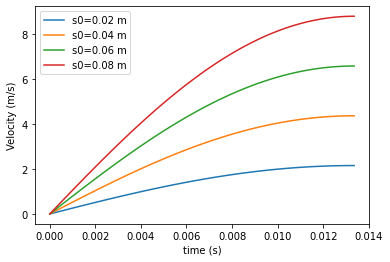

In [7]:
plt.clf()
for s0 in np.array([0.01, 0.02, 0.03, 0.04])*Ns:
    y0 = [s0, v0]

    t_end = so.newton(maxVelocity, 0.013)

    t = np.linspace(0,t_end,100)

    sol = si.odeint(spring, y0, t)

    s = sol[:,0]
    v = sol[:,1]
    plt.plot(t, v, label='s0=%0.2f m' % s0)
    
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('Velocity (m/s)')

plt.savefig('compressions.png', dpi=300)